# From Loop to O'Hare: Data-Driven Insights on Taxi Operations in Chicago

---
# Table of Contents
<a id='back'></a>

1. [Introduction](#introduction)
2. [Exploratory Data Analysis](#eda)
    * [Data Import and Inspection](#import)
    * [Identifying the Top 10 Drop-Off Areas Based on the Number of Trips](#identify)
3. [Hypotheses Testing](#test)
4. [Conclusions](#conclusion)

---
# Introduction
<a id='introduction'></a>

This project aims to conduct exploratory data analysis and hypothesis testing using the following datasets:
1. Taxi Company Information
2. Average Number of Trips per Area in Chicago
3. Trip Information from the Loop to O'Hare International Airport

## Exploratory Data Analysis

In this phase, information related to taxi companies and trips in Chicago will be analyzed. The first dataset contains information about taxi companies, including company names and the number of trips on 15th-16th November 2017. The second dataset provides data on the names of areas in Chicago where trips ended, along with the average number of trips that ended in each area during November 2017.

The steps to be undertaken in the exploratory data analysis include:
1. Importing and inspecting data from both datasets.
2. Ensuring that each column has the correct data type.
3. Identifying the top 10 drop-off areas based on the number of trips.
4. Creating visualizations to illustrate the number of trips per taxi company and the top 10 drop-off areas.

## Hypothesis Testing

The next stage involves hypothesis testing using a dataset containing information on trips from the Loop to O'Hare International Airport. The hypotheses to be tested are as follows:
- Null Hypothesis (H0): The average duration of trips from the Loop to O'Hare International Airport does not change on rainy Saturdays.
- Alternative Hypothesis (H1): The average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays.

The test will be conducted using an independent t-test, and the significance level (alpha) will be defined beforehand.

[Back to Table of Contents](#back)

---
# Exploratory Data Analysis
<a id='eda'></a>

## Data Import and Inspection
<a id='import'></a>

### Importing Data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Load datasets
df_company = pd.read_csv('data/chicago_taxi_data_01.csv')
df_dropoff = pd.read_csv('data/chicago_taxi_data_02.csv')

In [11]:
# Explore data
df_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


On 15-16th November 2017, Flash Cab dominated in terms of the number of trips, indicating greater popularity or a higher level of service compared to other taxi companies.

In [12]:
df_dropoff.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


**Loop**, **River North**, and **Streeterville** are the areas with the highest average number of trips, indicating a high demand or popularity of these locations as drop-off destinations.

### Checking Data Types

In [13]:
# ensure data types
df_company['trips_amount'] = pd.to_numeric(df_company['trips_amount'], errors='coerce')
df_dropoff['average_trips'] = pd.to_numeric(df_dropoff['average_trips'], errors='coerce')

In [14]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [15]:
df_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


After rechecking data types, both datasets can be proceed further for analysis.

[Back to Table of Contents](#back)

---
## Identifying the Top 10 Drop-Off Areas Based on the Number of Trips
<a id='identify'></a>

In [16]:
# identify top 10 dropoff locations
top_10_dropoff = df_dropoff.sort_values(by='average_trips', ascending=False)
top_10_dropoff.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Visual Graphic of Trips Amount by Company

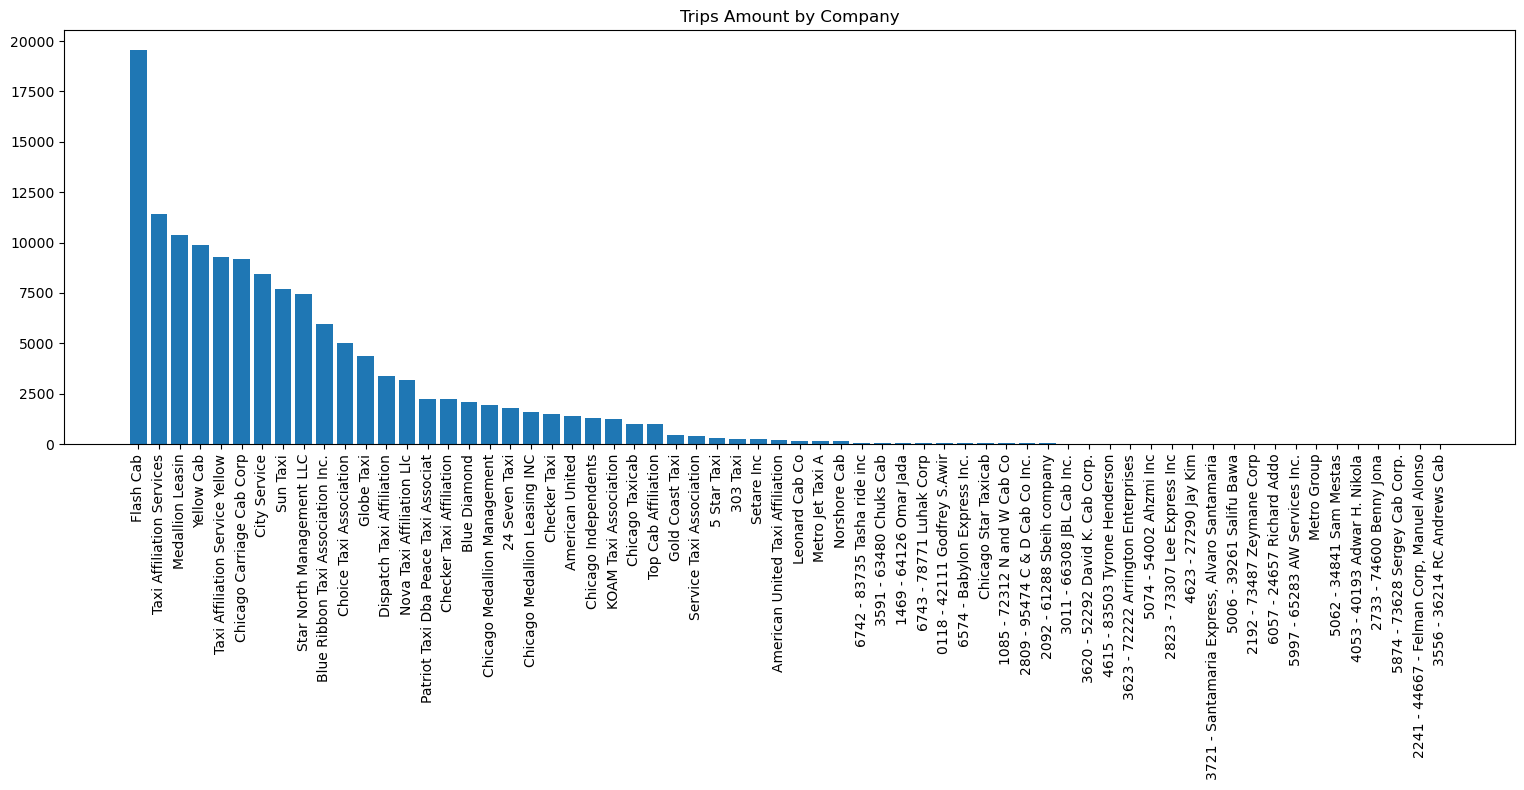

In [17]:
plt.figure(figsize=(30, 8))

# Plot Company and Trips
plt.subplot(1, 2, 1)
plt.bar(df_company['company_name'], df_company['trips_amount'])
plt.title('Trips Amount by Company')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

1. **Flash Cab dominates in terms of trip volume**, indicating greater popularity or a higher level of service compared to other companies.
2. Taxi Affiliation Services, Medallion Leasing, and Yellow Cab also show significant dominance following Flash Cab.

### Visual Graphic of Top Ten Drop-Off Areas

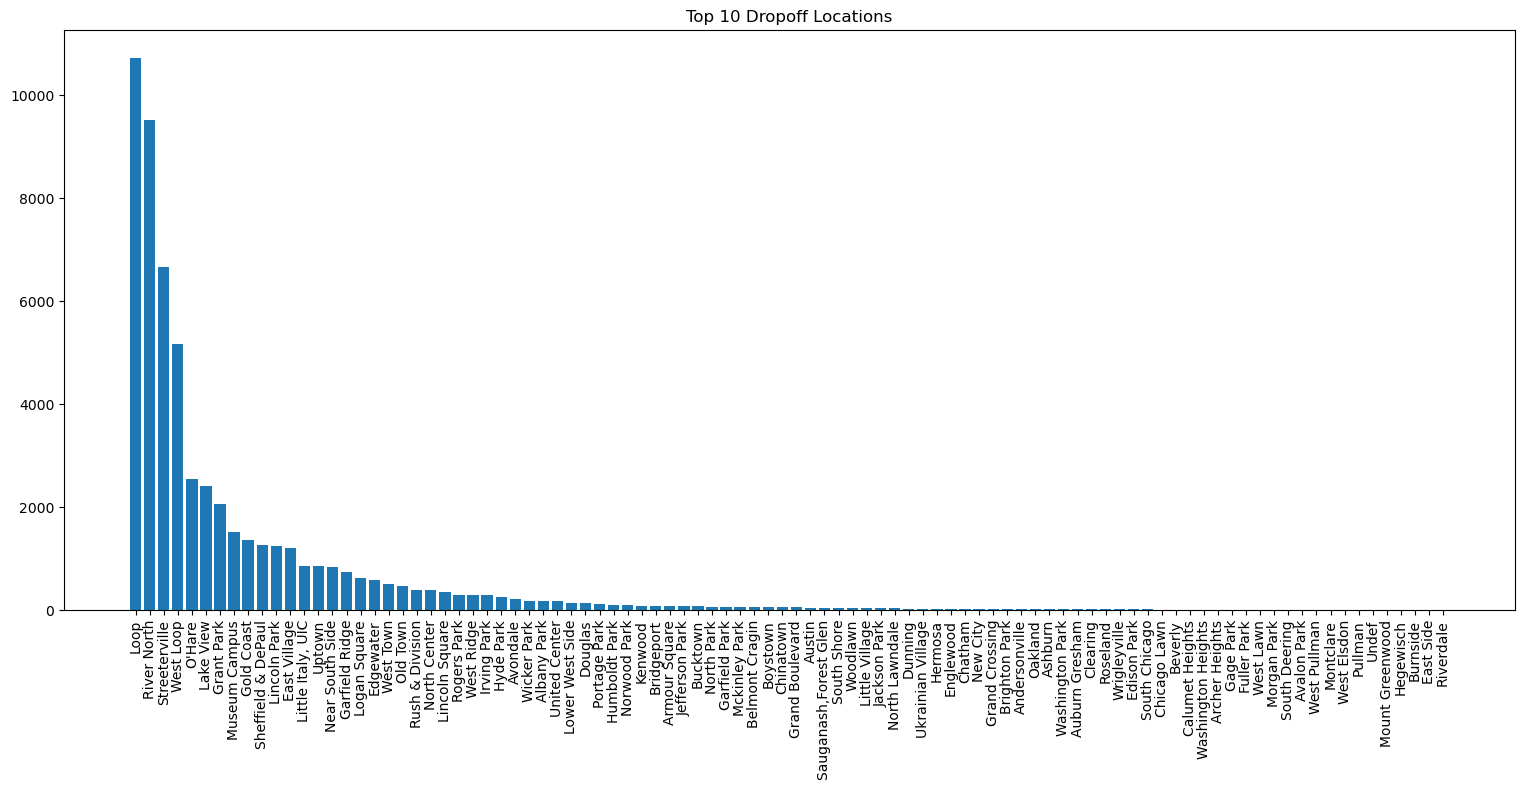

In [18]:
plt.figure(figsize=(30, 8))

# Plot Top 10 Dropoff Locations
plt.subplot(1, 2, 2)
plt.bar(top_10_dropoff['dropoff_location_name'], top_10_dropoff['average_trips'])
plt.title('Top 10 Dropoff Locations')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

1. The "Loop" area stands out as the most popular drop-off point, recording the highest average number of trips.
2. Areas such as "River North," "Streeterville," and "West Loop" also exhibit high drop-off volumes.
3. The "O'Hare" area ranks fifth, with a lower average number of trips compared to other downtown locations.
4. This information can offer valuable insights for taxi service providers to optimize their operations in areas with high drop-off demand.

[Back to Table of Contents](#back)

---
# Hypotheses Testing
<a id='test'></a>

## Hyphotheses
- **Null Hypothesis (H0)**: The average trip duration from the Loop to O'Hare International Airport does not change on rainy Saturdays.
- **Alternative Hypothesis (H1)**: The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [19]:
from scipy import stats
import seaborn as sns

In [20]:
# Load dataset
df_hypothesis = pd.read_csv('data/chicago_taxi_data_03')

In [21]:
# Convert 'start_ts' to datetime
df_hypothesis['start_ts'] = pd.to_datetime(df_hypothesis['start_ts'])

In [22]:
# Filter data 'Saturday and rainy conditions'
saturday_rainy = df_hypothesis[(df_hypothesis['start_ts'].dt.day_name() == 'Saturday') & (df_hypothesis['weather_conditions'] == 'Bad')]

In [23]:
# Display unique values in 'duration_seconds' for both conditions
("Unique durations for Saturday Rainy Conditions:", saturday_rainy['duration_seconds'].unique())
("Unique durations for Overall Dataset:", df_hypothesis['duration_seconds'].unique())

('Unique durations for Overall Dataset:',
 array([2410., 1920., 1543., 2512., 1440., 1320., 2969., 2280., 2460.,
        2040., 1500., 1470., 1546., 2100.,   60., 2640., 1502., 1915.,
        2769., 2250., 1260., 2826., 3360., 3180., 1800., 2289., 1494.,
        1560., 1980., 2115., 1506., 2580., 1620., 1163., 1533., 1477.,
        1984., 2940., 1683., 1343., 1742., 1358., 2760., 1380., 1415.,
        1325., 1200., 2363., 1140., 2520., 3000., 3084., 2213., 3120.,
        4800., 1346., 2843., 1435., 2426., 1740., 2340., 2075., 1333.,
        2574., 2441., 3300., 1511., 2220., 2551., 2062., 2999., 1677.,
        1177., 1475., 3201., 1277., 1213., 4044., 1680., 2074., 2782.,
        2591., 3240., 1869., 1218., 2123., 1384., 3060., 3480., 2071.,
        3024., 1667., 2056., 1473., 3540., 2778., 1420., 2055., 2240.,
        2380., 2160., 1539., 1591., 2588., 1162.,    0., 1239., 2820.,
        3130., 2877., 2934., 3270., 1860., 2054., 2293., 2880., 2525.,
        1323., 1487., 1020., 1883.,

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


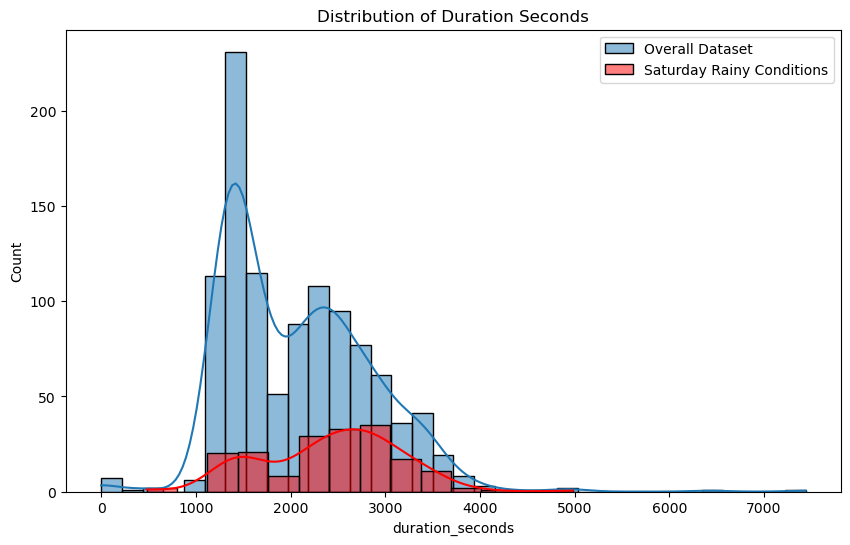

In [24]:
# Visualize the distribution of 'duration_seconds' for both conditions
plt.figure(figsize=(10, 6))
sns.histplot(df_hypothesis['duration_seconds'], kde=True, label='Overall Dataset')
sns.histplot(saturday_rainy['duration_seconds'], kde=True, color='red', label='Saturday Rainy Conditions')
plt.title('Distribution of Duration Seconds')
plt.legend()
plt.show()

## Statistical Testing

In [25]:
# Set significance level
alpha = 0.05

# Perform t-test
t_stat, p_value = stats.ttest_ind(saturday_rainy['duration_seconds'], df_hypothesis['duration_seconds'], equal_var=False)

# Evaluate the hypothesis
if p_value < alpha:
    print(f"Reject the null hypothesis. p-value: {p_value}")
else:
    print(f"Fail to reject the null hypothesis. p-value: {p_value}")

Reject the null hypothesis. p-value: 5.013652852599471e-09


## Results
- Based on the statistical analysis, **we reject the null hypothesis** due to the extremely low p-value (5.013652852599471e-09).
- The very small p-value indicates that the difference in trip duration between the Loop and O'Hare International Airport on rainy Saturdays is statistically significant compared to the general average duration.

## Conclusion
- Based on the statistical test results, there is sufficient statistical evidence to conclude that **the trip duration from the Loop to O'Hare International Airport changes significantly on rainy Saturdays**.
- This supports the alternative hypothesis and suggests that **rainy weather conditions can influence trip duration on this route**.

[Back to Table of Contents](#back)

---
# Conclusions
<a id='conclusion'></a>

## Exploratory Data Analysis
1. Following the data import and inspection process, all column data types were confirmed to be appropriate and suitable for further analysis.
2. The top 10 drop-off areas based on the number of trips were identified as:
   - Loop
   - River North
   - Streeterville
   - West Loop
   - O'Hare
   - Lake View
   - Grant Park
   - Museum Campus
   - Gold Coast
   - Sheffield & DePaul
3. Visualizations were created to depict the number of trips per taxi company and the top 10 drop-off areas.

## Hypotheses Testing
1. Hypothesis Statement:
   - The hypothesis tested was: "The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays."
   - The significance level (alpha) was set at 0.05.

2. Test Results:
   - On rainy Saturdays, the test produced a p-value of 5.013652852599471e-09, leading to a rejection of the null hypothesis.
   - The extremely small p-value indicates that the difference in trip duration from the Loop to O'Hare International Airport on rainy Saturdays is statistically significant when compared to the general average trip duration.

[Back to Table of Contents](#back)